In [2]:
import os
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from pandas.api.types import CategoricalDtype
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

/Users/Hoffmann/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
/Users/Hoffmann/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [19]:
data_path = os.path.join(os.getcwd(), 'datasets', 'landsat.csv')

In [20]:
landsat = pd.read_csv(data_path, delimiter=',')

In [21]:
landsat.head()

,pixel1_1,pixel1_2,pixel1_3,pixel1_4,pixel2_1,pixel2_2,pixel2_3,pixel2_4,pixel3_1,pixel3_2,...,pixel7_4,pixel8_1,pixel8_2,pixel8_3,pixel8_4,pixel9_1,pixel9_2,pixel9_3,pixel9_4,class
0,92.0,115.0,120.0,94.0,84.0,102.0,106.0,79.0,84.0,102.0,...,104.0,88.0,121.0,128.0,100.0,84.0,107.0,113.0,87.0,3
1,84.0,102.0,106.0,79.0,84.0,102.0,102.0,83.0,80.0,102.0,...,100.0,84.0,107.0,113.0,87.0,84.0,99.0,104.0,79.0,3
2,84.0,102.0,102.0,83.0,80.0,102.0,102.0,79.0,84.0,94.0,...,87.0,84.0,99.0,104.0,79.0,84.0,99.0,104.0,79.0,3
3,80.0,102.0,102.0,79.0,84.0,94.0,102.0,79.0,80.0,94.0,...,79.0,84.0,99.0,104.0,79.0,84.0,103.0,104.0,79.0,3
4,84.0,94.0,102.0,79.0,80.0,94.0,98.0,76.0,80.0,102.0,...,79.0,84.0,103.0,104.0,79.0,79.0,107.0,109.0,87.0,3


In [22]:
X = landsat.drop(['class'], axis=1)

In [23]:
y = landsat['class'].values

In [83]:
len(X.columns)

36

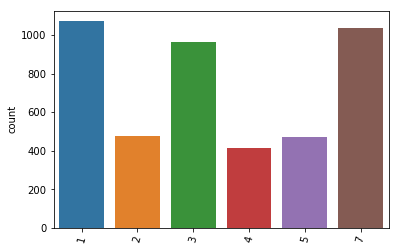

In [33]:
# Plotting the class distribution
ax = sns.countplot(x="class", data=landsat)
#ax.set_xticklabels(['red soil','cotton crop','grey soil','damp grey soil','soil with vegetation stubble','very damp grey soil'])
ax.xaxis.label.set_visible(False)
plt.xticks(rotation=75)
plt.show()

In [26]:
kmeans = KMeans(n_clusters=6, random_state=1000).fit(X)

In [27]:
kmeans.inertia_

11321556.158835351

In [39]:
y_pred = kmeans.predict(X)

In [29]:
adjusted_rand_score(y, y_pred)

0.5347867858726397

In [31]:
len(kmeans.labels_)

4435

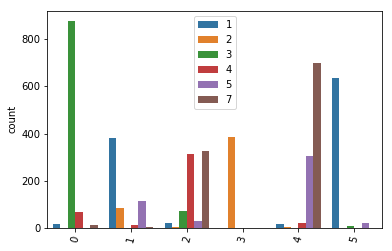

In [43]:
ax = sns.countplot(x=kmeans.labels_, hue=y)
#ax.set_xticklabels(['red soil','cotton crop','grey soil','damp grey soil','soil with vegetation stubble','very damp grey soil'])
ax.xaxis.label.set_visible(False)
plt.xticks(rotation=75)
plt.show()

In [44]:
pca = PCA(n_components=2, random_state=1000)

In [45]:
X_2d = pca.fit_transform(X)

In [49]:
X_2d[0]

array([121.93459589,   9.88287977])

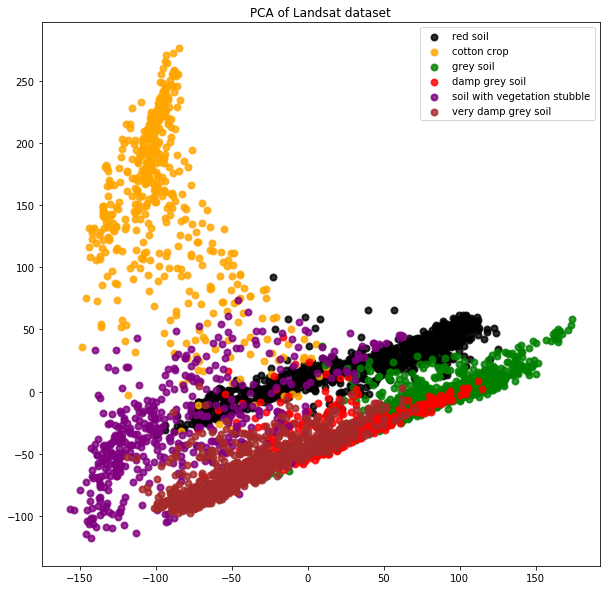

In [53]:
plt.figure(figsize=(10,10))
colors = ['black', 'orange', 'green', 'red', 'purple', 'brown']
target_names = ['red soil','cotton crop','grey soil','damp grey soil','soil with vegetation stubble','very damp grey soil']
lw = 2

for color, i, target_name in zip(colors, [1,2,3,4,5,7], target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Landsat dataset')
plt.show()

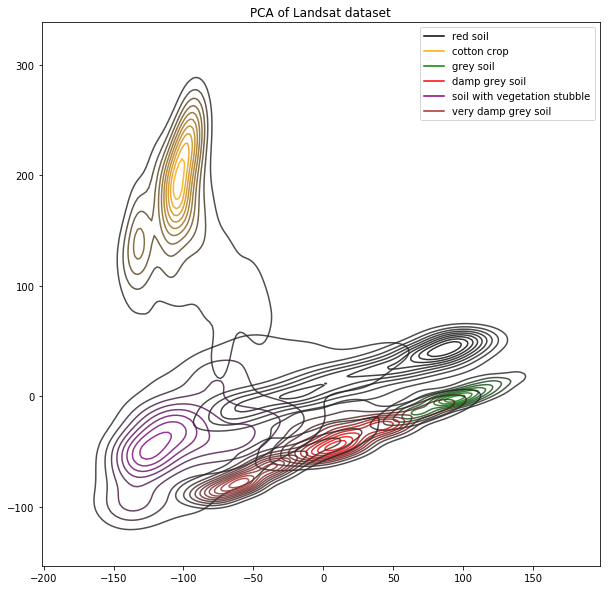

In [55]:
plt.figure(figsize=(10,10))
colors = ['black', 'orange', 'green', 'red', 'purple', 'brown']
target_names = ['red soil','cotton crop','grey soil','damp grey soil','soil with vegetation stubble','very damp grey soil']
lw = 2

for color, i, target_name in zip(colors, [1,2,3,4,5,7], target_names):
    sns.kdeplot(X_2d[y == i, 0], X_2d[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Landsat dataset')
plt.show()

In [58]:
kmeans2d = KMeans(n_clusters=6, random_state=1000).fit(X_2d)

In [59]:
y_pred_2d = kmeans2d.predict(X_2d)

In [60]:
kmeans2d.inertia_

4807149.403728699

In [61]:
kmeans2d.labels_

array([4, 4, 1, ..., 1, 1, 1], dtype=int32)

In [62]:
adjusted_rand_score(y, kmeans2d.labels_)

0.325853938226581

In [63]:
print('=========== Number of Clusters ===========\n')
for ii in range(1,20,2):
    km = KMeans(n_clusters=ii, random_state=1000)  
    km.fit(X_2d)
    y_pred = km.labels_
    print('k-means with {} clusters on 2D PCA:\nARI: {}, Inertia: {}\n\n'.
          format(ii, adjusted_rand_score(y, y_pred), km.inertia_))

=========== Number of Clusters ===========

k-means with 1 clusters on 2D PCA:
ARI: 0.0, Inertia: 45914430.80946535


k-means with 3 clusters on 2D PCA:
ARI: 0.3107272058667739, Inertia: 10082233.489173533


k-means with 5 clusters on 2D PCA:
ARI: 0.3681635607136305, Inertia: 5780212.164471396


k-means with 7 clusters on 2D PCA:
ARI: 0.37923464544197016, Inertia: 4163708.320109182


k-means with 9 clusters on 2D PCA:
ARI: 0.42956450996219425, Inertia: 3075391.2192643397


k-means with 11 clusters on 2D PCA:
ARI: 0.4066007189666339, Inertia: 2341991.0141074834


k-means with 13 clusters on 2D PCA:
ARI: 0.38741201241162476, Inertia: 1855674.2172332136


k-means with 15 clusters on 2D PCA:
ARI: 0.3525142537453227, Inertia: 1542797.129212933


k-means with 17 clusters on 2D PCA:
ARI: 0.3281607482002166, Inertia: 1331956.1137908616


k-means with 19 clusters on 2D PCA:
ARI: 0.28772347559892253, Inertia: 1170298.2395570872




In [64]:
print('\n======== Number of PCA Components ========\n')
for ii in range(2, 6):
    X_pca = PCA(n_components = ii).fit_transform(X)
    km = KMeans(n_clusters=6, random_state=1000)  
    km.fit(X_pca)
    y_pred = km.labels_
    print('k-means with 6 clusters on {}D PCA:\nARI: {}, Inertia: {}\n\n'.
          format(ii, adjusted_rand_score(y, y_pred), km.inertia_))


======== Number of PCA Components ========

k-means with 6 clusters on 2D PCA:
ARI: 0.325853938226581, Inertia: 4807149.403728714


k-means with 6 clusters on 3D PCA:
ARI: 0.5338544932324678, Inertia: 5755863.298748901


k-means with 6 clusters on 4D PCA:
ARI: 0.5326617899167192, Inertia: 7035746.13114228


k-means with 6 clusters on 5D PCA:
ARI: 0.5333959946899518, Inertia: 8112823.514731508




In [65]:
print('\n======== Gaussian Naive Bayes PCA ========\n')
for ii in range(2, 6):
    X_pca = PCA(n_components = ii).fit_transform(X)
    gnb = GaussianNB()
    gnb.fit(X_pca, y)
    y_pred = gnb.predict(X_pca)
    print('Gaussian Naive Bayes on {}D PCA:\nARI: {}, Mean Accuracy: {}\n\n'.
          format(ii, adjusted_rand_score(y, y_pred), gnb.score(X_pca, y)))
gnb = GaussianNB()
gnb.fit(X, y)
y_pred = gnb.predict(X)
print('Gaussian Naive Bayes on Full Data\nARI: {}, Mean Accuracy: {}\n\n'.
      format(adjusted_rand_score(y, y_pred), gnb.score(X, y)))



======== Gaussian Naive Bayes PCA ========

Gaussian Naive Bayes on 2D PCA:
ARI: 0.6141301529343662, Mean Accuracy: 0.7889515219842165


Gaussian Naive Bayes on 3D PCA:
ARI: 0.721394085820073, Mean Accuracy: 0.839684329199549


Gaussian Naive Bayes on 4D PCA:
ARI: 0.7225888774287328, Mean Accuracy: 0.8414881623449831


Gaussian Naive Bayes on 5D PCA:
ARI: 0.7260799363725376, Mean Accuracy: 0.8430665163472378


Gaussian Naive Bayes on Full Data
ARI: 0.6297581028628966, Mean Accuracy: 0.7977452085682074




In [66]:
for ii in range(2, 6):
    X_pca = PCA(n_components = ii).fit_transform(X)
    rf = RandomForestClassifier(n_estimators=100, random_state=1337, oob_score=True)
    rf.fit(X_pca, y)
    y_pred = np.argmax(rf.oob_decision_function_, axis=1)
    print('Random Forests on {}D PCA:\nARI: {}, Mean Accuracy: {}\n\n'.
          format(ii, adjusted_rand_score(y, y_pred), rf.oob_score_))
rf = RandomForestClassifier(n_estimators=100, random_state=1000, oob_score=True)
rf.fit(X, y)
y_pred = np.argmax(rf.oob_decision_function_, axis=1)
print('Random Forest on Full Data\nARI: {}, Mean Accuracy: {}\n\n'.
      format(adjusted_rand_score(y, y_pred), rf.oob_score_))

Random Forests on 2D PCA:
ARI: 0.6823191623675634, Mean Accuracy: 0.8232243517474633


Random Forests on 3D PCA:
ARI: 0.7536823910695818, Mean Accuracy: 0.8656144306651635


Random Forests on 4D PCA:
ARI: 0.7780434350544246, Mean Accuracy: 0.882750845546787


Random Forests on 5D PCA:
ARI: 0.794025605402452, Mean Accuracy: 0.8908680947012402


Random Forest on Full Data
ARI: 0.8286925170993926, Mean Accuracy: 0.9111612175873731




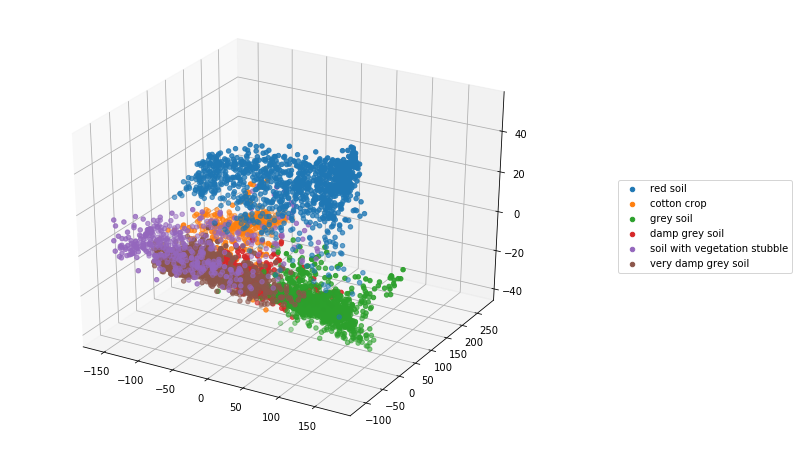

In [67]:
X_3d = PCA(n_components=3).fit(X).transform(X)
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=300)
sub_labels = [1,2,3,4,5,7]
sub_cats = ['red soil','cotton crop','grey soil','damp grey soil','soil with vegetation stubble','very damp grey soil']
for label, cat in zip(sub_labels, sub_cats):
    idx = y == label
    ax.scatter(X_3d[idx, 0], X_3d[idx, 1], X_3d[idx, 2], label = cat)
plt.legend(loc='center left', bbox_to_anchor=[1.1, .5])
plt.show()

In [68]:
X_2d.shape

(4435, 2)

In [73]:
X_ = X.values
X_[0]

array([ 92., 115., 120.,  94.,  84., 102., 106.,  79.,  84., 102., 102.,
        83., 101., 126., 133., 103.,  92., 112., 118.,  85.,  84., 103.,
       104.,  81., 102., 126., 134., 104.,  88., 121., 128., 100.,  84.,
       107., 113.,  87.])

In [76]:
mu = np.mean(X_, axis=0)
X_nm = X_ - mu

In [90]:
pca_ = PCA().fit(X_nm)
Xhat = np.dot(pca_.transform(X_nm)[:,:nComp], pca_.components_[:nComp,:])
Xhat += mu

In [91]:
np.sqrt(mean_squared_error(X_, Xhat))

0.28137468231633217

In [95]:
len(PCA(35).fit(X_nm).explained_variance_)

35

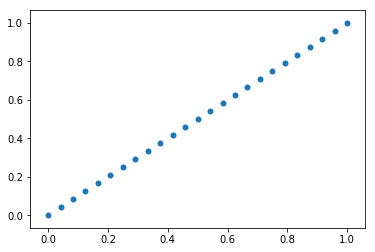

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

fig, ax = plt.subplots()

xVals = np.linspace(0, 1, 25)

# Plot the surface.
surf = ax.scatter(np.array(xVals), np.array(xVals), cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=0, vmax=1)

plt.show()